# El modelo epidémico de SIR
Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

* S(t) son aquellos susceptibles pero aún no infectados con la enfermedad;
* I(t) es el número de individuos infecciosos;
* R(t) son aquellas personas que se han recuperado de la enfermedad y ahora tienen inmunidad.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros,  beta y  gamma.  
- Beta describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con  beta*N otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S/N).  
- Gamma es la tasa de recuperación promedio: es decir, 1/ gamma es el período de tiempo promedio durante el cual una persona infectada puede transmitirlo.

Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]:

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros  beta=0.2, gamma=10  en una población de N=1000 (quizás 'gripe en una escuela ) El modelo se inicia con una sola persona infectada el día 0: I(0)=1. Las curvas trazadas de S(t), I(t) y R(t) están diseñadas para verse un poco mejor que los valores predeterminados de Matplotlib.

In [27]:
# Valores de beta y gamma de casos de covid en Ecuador (confirmados, muertos y recuperados)
# Calculados en COVID19-SIR-master

print("fun: 85134.79470511741")
print(" hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>")
print("      jac: array([ 15.11652954, -41.30852176])")
print("  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'")
print("     nfev: 63")
print("      nit: 63")
print("     njev: 21")
print("   status: 0")
print("  success: True")
print("        x: array([0.01113235, 0.01124025])")
print("country=Ecuador, beta=0.01392605,  gamma=0.01399518, r_0:0.99506067")

fun: 85134.79470511741
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 15.11652954, -41.30852176])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 63
      nit: 63
     njev: 21
   status: 0
  success: True
        x: array([0.01113235, 0.01124025])
country=Ecuador, beta=0.01392605,  gamma=0.01399518, r_0:0.99506067


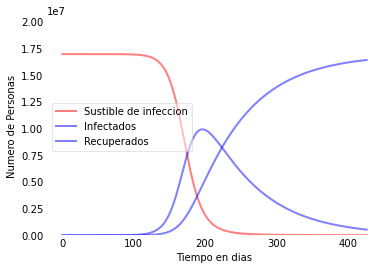

7.145317173484014


In [28]:
#Importar las librerias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total de la poblacion
N = 17000000

# Numero Inicial de Infectados
I0 = 6

# Numero de Recuperados
R0 = 0

# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

# Tasa de contacto, beta (nivel de repoductividad del virus)
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en aproximadamente 72 dias.
beta, gamma = 0.1, 0.01399518

# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 426, 426)



# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0

# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'r', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'b', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'b', alpha=0.5, lw=2, label='Recuperados')

ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Ro = beta/gamma
print(Ro)


## Generar la prediccion del modelos SIR

 Se debe  estimar el valor de 
- β 
- γ

Para ajustar el modelo SIR con los casos confirmados reales (el número de personas infecciosas) del Ecuador.
 
 Para ello deben seguir el siguiente tutorial 
 https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
 


## Analisis

### Según podemos ver en la gráfica el número de personas suceptibles de infección empezará a bajar alrededor de los 150 días y se estabilizará en los 250 días. 

### Por otra parte, el pico mas alto de infección se obtendrá en los 200 dias empezado la pandemia e irá bajando gradualmente en los 300 días, empezando a estabilizarse en los 400 días.

### También  notaremos que a partir de los 100 días empezarán a haber personas recuperadas, incrementandose gradualmente a partir de los 120 días, y estabilizando el número de recuperados a partir de los 400 días.

## Conclusiones

### El confinamiento es escencial para la disminusión de contagios de COVID, como se muestra en la curva de los primeros 100 días, en donde hubo toque de queda, la curva fue creciendo reglarmente, mientras que a las 200 días de la pandemia el toque de queda se anuló, la curva creció de una manera exponencial. También se puede concluir que mientras mas crece la curva de recuperados, la curva de susceptibles de infección también baja.

## Opinion

### La tasa de contagios R0 en Ecuador esta un poco por debajo de lo normal, lo que representa que el virus en Ecuador no es tan contagioso como en otro paises del mundo, por lo mismo también se puede notar que de no existir cuarentena en Ecuador, los contagiados crecen de manera exponencial.

# Referencias:
- https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
- https://rpubs.com/dsfernandez/422937
- https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2